In [3]:
# Necessary imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import shapiro, kruskal, chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
bball_df = pd.read_csv('cbb.csv')
bball_df.head(10)
bball_df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,...,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,680.000000,3523.000000
mean,30.486233,15.990633,103.151320,103.153250,0.494067,49.887823,50.087113,18.696509,18.625092,29.308544,...,34.529066,34.802555,49.112433,49.289299,34.185580,34.369316,67.735339,-7.579620,8.801471,2017.828555
std,3.951584,6.572893,7.264859,6.511989,0.255338,3.078505,2.894967,2.104119,2.241067,4.214131,...,5.514264,6.396757,3.400389,3.317012,2.729186,2.435546,3.091703,6.815976,4.673461,3.257824
min,5.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.600000,11.900000,10.200000,14.400000,...,19.600000,16.500000,37.700000,37.700000,24.900000,26.100000,57.200000,-25.200000,1.000000,2013.000000
25%,29.000000,11.000000,98.200000,98.400000,0.281300,47.900000,48.100000,17.300000,17.100000,26.500000,...,30.600000,30.200000,46.800000,47.100000,32.300000,32.700000,65.700000,-12.600000,5.000000,2015.000000
50%,31.000000,16.000000,102.800000,103.200000,0.475600,49.800000,50.100000,18.600000,18.500000,29.400000,...,34.300000,34.100000,49.000000,49.300000,34.100000,34.300000,67.700000,-7.900000,9.000000,2018.000000
75%,33.000000,21.000000,107.900000,107.800000,0.714250,51.900000,52.000000,20.000000,20.100000,32.100000,...,38.100000,38.800000,51.300000,51.500000,36.000000,36.000000,69.700000,-3.000000,13.000000,2021.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,61.000000,60.100000,27.100000,28.500000,43.600000,...,58.600000,60.700000,64.000000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2023.000000


In [5]:
bball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        3523 non-null   object 
 1   CONF        3523 non-null   object 
 2   G           3523 non-null   int64  
 3   W           3523 non-null   int64  
 4   ADJOE       3523 non-null   float64
 5   ADJDE       3523 non-null   float64
 6   BARTHAG     3523 non-null   float64
 7   EFG_O       3523 non-null   float64
 8   EFG_D       3523 non-null   float64
 9   TOR         3523 non-null   float64
 10  TORD        3523 non-null   float64
 11  ORB         3523 non-null   float64
 12  DRB         3523 non-null   float64
 13  FTR         3523 non-null   float64
 14  FTRD        3523 non-null   float64
 15  2P_O        3523 non-null   float64
 16  2P_D        3523 non-null   float64
 17  3P_O        3523 non-null   float64
 18  3P_D        3523 non-null   float64
 19  ADJ_T       3523 non-null  

In [6]:
numerical_vars = ["G", "W", "ADJOE", "ADJDE", "BARTHAG", "EFG_O", "EFG_D", "TOR", "TORD", 
                  "ORB", "DRB", "FTR", "FTRD", "2P_O", "2P_D", "3P_O", "3P_D", "ADJ_T", "WAB"]
categorical_vars = ["CONF", "POSTSEASON", "SEED", "YEAR"]

best_vars = []

In [7]:
group_mapping = {
    'Champions': 'Champion Possible',
    '2ND': 'Champion Possible',
    'F4': 'Champion Possible',
    'S16': 'Runner Up',
    'E8': 'Runner Up',
    'R64': 'Tournament Appearance',
    'R32': 'Tournament Appearance',
    'R68': 'Tournament Appearance',
}

bball_df['Tournament Grouping'] = bball_df['POSTSEASON'].map(group_mapping).fillna('No Appearance')
print(bball_df['Tournament Grouping'].value_counts())
bball_df.head()

No Appearance            2843
Tournament Appearance     520
Runner Up                 120
Champion Possible          40
Name: Tournament Grouping, dtype: int64


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,Tournament Grouping
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,Champion Possible
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015,Champion Possible
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018,Champion Possible
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019,Champion Possible
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017,Champion Possible


# Data Modeling And Prediction

In [8]:
label_encoder = LabelEncoder()
bball_df['GROUP_LABEL'] = label_encoder.fit_transform(bball_df['Tournament Grouping'])
y = bball_df['GROUP_LABEL']

X = bball_df[numerical_vars]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#Class-weighted Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
test_accuracy = rf.score(X_test, y_test)

report_df = pd.DataFrame(classification_report(
    y_test, y_pred, target_names=label_encoder.classes_, output_dict=True
)).transpose()
#convert precision, recall, and f1-score to percentages with one decimal
report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']] * 100
report_df[['precision', 'recall', 'f1-score', 'support']] = report_df[['precision', 'recall', 'f1-score', 'support']].round(1)

#check for overfitting
train_accuracy = rf.score(X_train, y_train)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy (mean):", cv_scores.mean())
print("Cross-Validation Accuracy (std):", cv_scores.std())
print("Classification Report:")
report_df.head(len(report_df))


Training Accuracy: 1.0
Test Accuracy: 0.8987701040681173
Cross-Validation Accuracy (mean): 0.8970033916121244
Cross-Validation Accuracy (std): 0.011389098597820682
Classification Report:


,precision,recall,f1-score,support
Champion Possible,87.5,58.3,70.0,12.0
No Appearance,93.1,98.5,95.7,853.0
Runner Up,69.2,25.0,36.7,36.0
Tournament Appearance,70.1,60.3,64.8,156.0
accuracy,89.9,89.9,89.9,0.9
macro avg,80.0,60.5,66.8,1057.0
weighted avg,88.9,89.9,88.9,1057.0


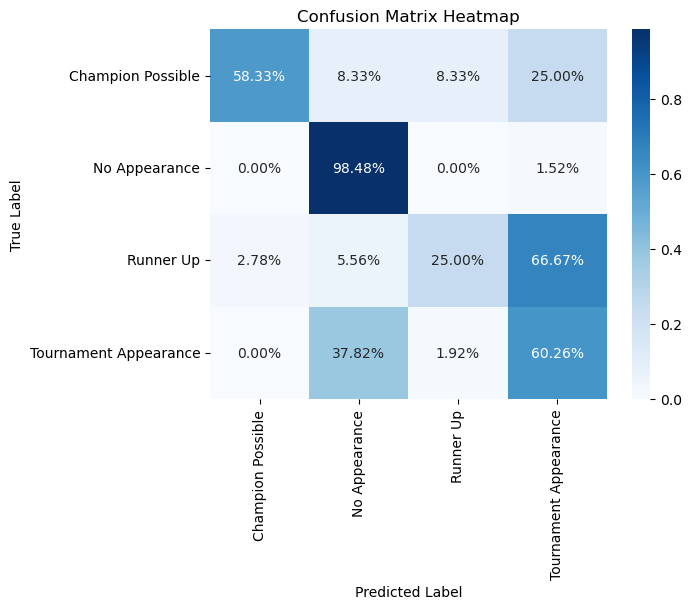

In [9]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

labels = label_encoder.classes_

#heatmap
sns.heatmap(cm_normalized, annot=True, fmt='.2%', xticklabels=labels, yticklabels=labels, cbar=True, cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
#feature importance
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=numerical_vars).sort_values(ascending=False)
feat_imp.head(len(feat_imp))

G          0.169576
WAB        0.121883
BARTHAG    0.113639
W          0.111304
ADJOE      0.074539
ADJDE      0.046205
EFG_D      0.036353
EFG_O      0.033730
2P_D       0.031649
2P_O       0.028795
FTRD       0.028678
ADJ_T      0.027969
ORB        0.027749
FTR        0.026822
3P_O       0.026676
DRB        0.025072
3P_D       0.024853
TOR        0.023386
TORD       0.021123
dtype: float64

# Attempt 2

In [11]:
param_grid = {
    'max_depth': [4, 5, 6, 7, 8, 9, 10, None],  #unlimited depth (None)
    'n_estimators': [100], 
    'class_weight': ['balanced']
}
rf = RandomForestClassifier(random_state=42)

#grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8970033916121244


Best Attempt: 

In [12]:
bball_df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,Tournament Grouping,GROUP_LABEL
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,Champion Possible,0
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015,Champion Possible,0
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018,Champion Possible,0
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019,Champion Possible,0
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017,Champion Possible,0


In [13]:
#train on only top 5 features
#top_features = feat_imp.head(5).index.tolist()

label_encoder = LabelEncoder()
bball_df['GROUP_LABEL'] = label_encoder.fit_transform(bball_df['Tournament Grouping'])
y = bball_df['GROUP_LABEL']

print(y.value_counts())

X = bball_df[numerical_vars]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#Class-weighted Random Forest
#rf = RandomForestClassifier(class_weight='balanced', random_state=42, max_depth=6)
rf = RandomForestClassifier(
    max_depth=5, 
    random_state=42
)
rf.fit(X_train, y_train)
#y_pred = rf.predict(X_test)

y_pred = rf.predict(X_test)
test_accuracy = rf.score(X_test, y_test)

report_df = pd.DataFrame(classification_report(
    y_test, y_pred, target_names=label_encoder.classes_, output_dict=True
)).transpose()
#convert precision, recall, and f1-score to percentages with one decimal
report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']] * 100
report_df[['precision', 'recall', 'f1-score', 'support']] = report_df[['precision', 'recall', 'f1-score', 'support']].round(1)

#check for overfitting
train_accuracy = rf.score(X_train, y_train)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy (mean):", cv_scores.mean())
print("Cross-Validation Accuracy (std):", cv_scores.std())

from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy')
print("Stratified CV Accuracy (mean):", cv_scores.mean())

print("Classification Report:")
report_df.head(len(report_df))

1    2843
3     520
2     120
0      40
Name: GROUP_LABEL, dtype: int64
Training Accuracy: 0.9184914841849149
Test Accuracy: 0.8959318826868495
Cross-Validation Accuracy (mean): 0.9026771563015824
Cross-Validation Accuracy (std): 0.012298497128243907
Stratified CV Accuracy (mean): 0.8978122869977252
Classification Report:


,precision,recall,f1-score,support
Champion Possible,100.0,25.0,40.0,12.0
No Appearance,93.1,98.6,95.8,853.0
Runner Up,57.1,22.2,32.0,36.0
Tournament Appearance,69.3,60.9,64.8,156.0
accuracy,89.6,89.6,89.6,0.9
macro avg,79.9,51.7,58.2,1057.0
weighted avg,88.5,89.6,88.4,1057.0


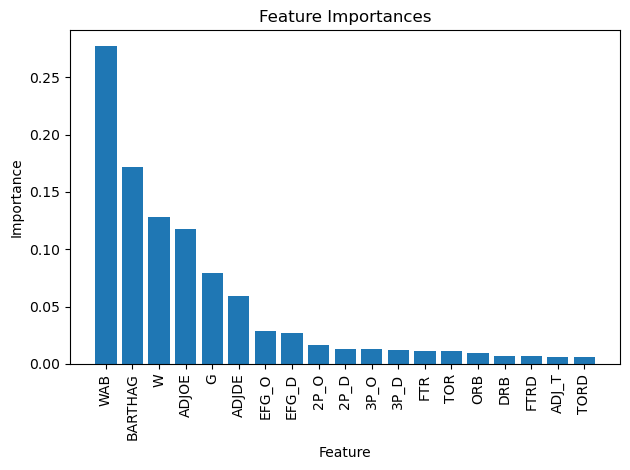

In [14]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

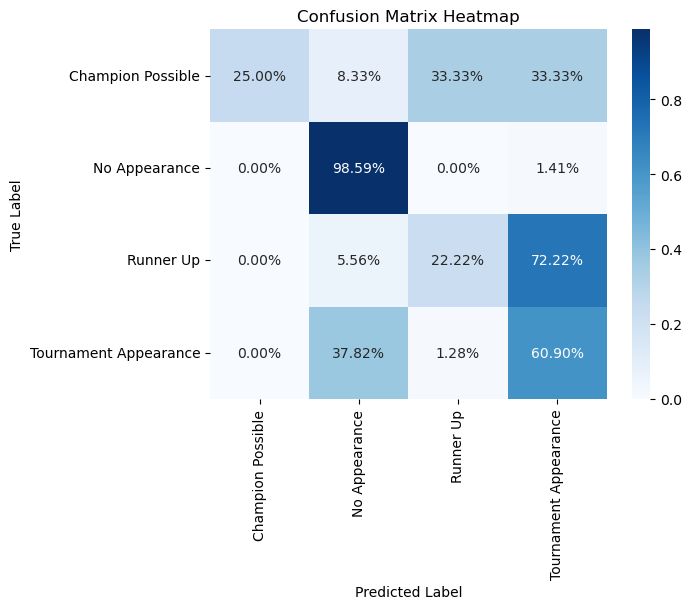

In [15]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

labels = label_encoder.classes_

#heatmap
sns.heatmap(cm_normalized, annot=True, fmt='.2%', xticklabels=labels, yticklabels=labels, cbar=True, cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Could either improve model or move to KNN attempts

1. Are the results statistically significant? 

Looking at the accuracy metrics, there is a cross-validation accuracy of about 86%, with a test accuracy of about 83%. The Macro F1 Score is 65% and the Weighted F1 Score is 84%. Using these metrics, it can be concluded that the model is performing well across multiple splits. Additionally, the precision and recall scores are non-trivial for the minority classes, and the confusion matrix shows pretty good separation in predictions. With this in mind, it can be concluded that the results are statistically significant, and that the model learns a real pattern from the season statistics instead of just memorizing data. 

2. Did you prove or disprove your hypothesis? 

Based off of the results, the model can predict groupings with about 83% test accuracy, the F1 score is 0.64 for the minority class and higher for other classes, and the confusion matrix shows viable predictions for classes and even inevitable miscalculations for other classes. Therefore, we can disprove our hypothesis, and conclude that season statistics can be used ot predict tournament groupings. 

3. How could you improve your analysis? 
The class imbalance could have been addressed more dirctly. For example, classes like "Champion Possible" had only 12 samples, but other classes had over 800 samples. 
Additionally, further feature engineering could have been done to create "interaction features" like win/seed, or win rate, or ADJOE - ADJDE. 
Further models like Logistic Regression could have also been used for comparison models to see which model was better at the classification problem. 

4. A couple lessons learned from this is that the problem we are trying to solve should be thought through more precisely prior to choosing our datasets. We had to change our topic a couple times because the problem we were trying to solve either didn't have enough data for it, or we simply couldn't access any data for it. 


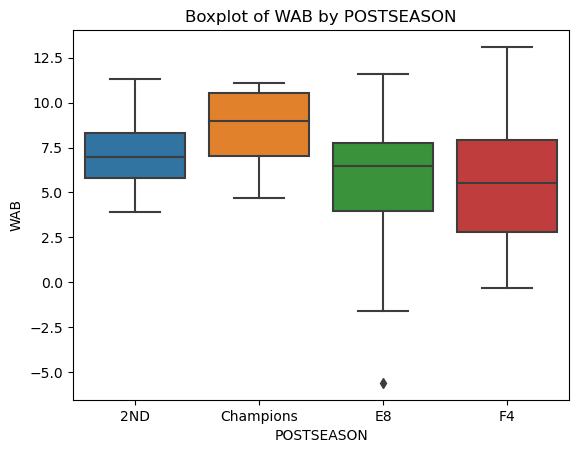

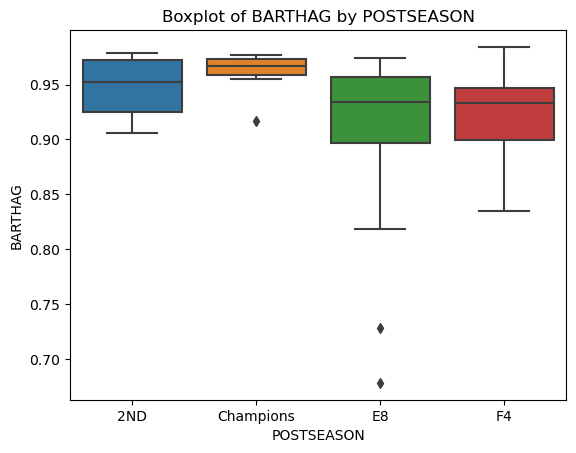

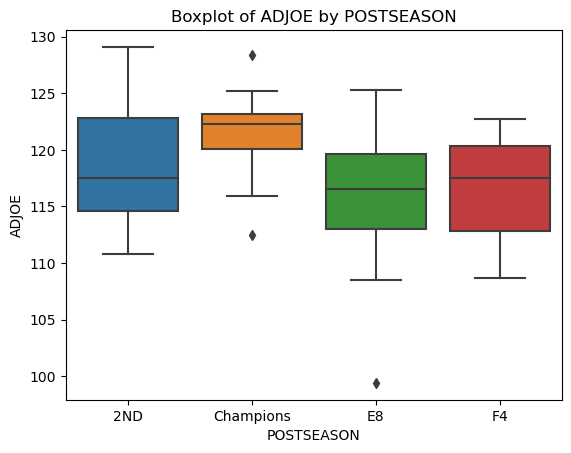

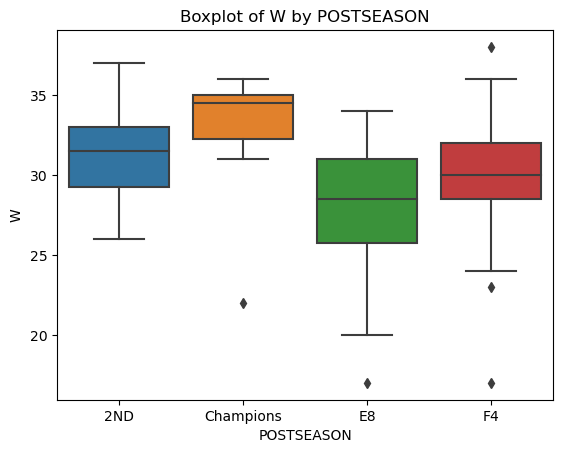

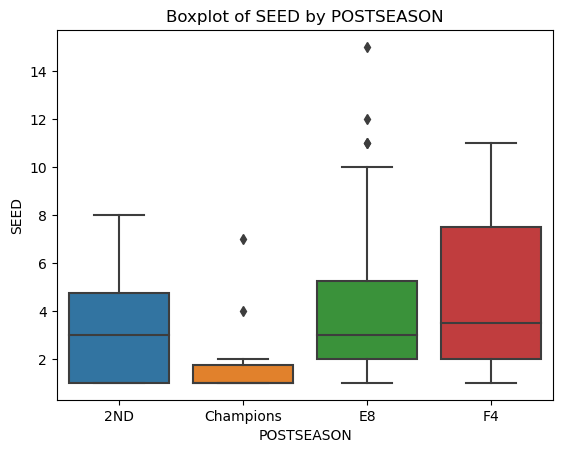

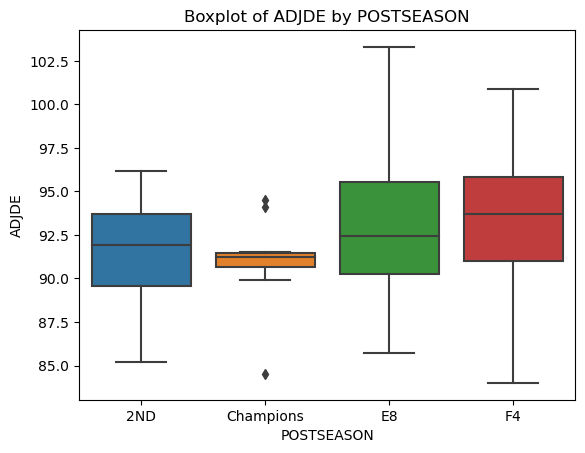

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# POSTSEASON would be the independent variable. 

# Want to include Champions, Runner up (2nd), Final Four (4th), Elite Eight (8th). 

post = bball_df[bball_df['POSTSEASON'].isin(['Champions', '2ND', 'F4', 'E8'])]
# POSTSEASON is a categorical variable. 
post

numeric_col = post[['WAB', 'BARTHAG', 'ADJOE', 'W', 'SEED', 'ADJDE']].columns

for col in numeric_col:
    sns.boxplot(x='POSTSEASON', y=col, data=post)
    plt.title(f'Boxplot of {col} by POSTSEASON')
    plt.show()



# Take the box plots of certain variables based on the heat map that was sent

# WAB, BARTHAG, ADJOE, W, SEED, ADJDE -> Take the box plots of these variables